# Import Library dan Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 6 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error #MSE
from math import sqrt

Pergerakan harga saham TLKM. PT. Telkom Indonesia (Persero) Tbk (TLKM) adalah badan usaha milik negara yang bergerak di sektor jasa telekomunikasi dan jaringan di Indonesia.

- Open adalah harga pembukaan saham pada saat transaksi dimulai dalam suatu periode transaksi. Biasanya, harga pembukaan sama dengan harga penutupan transaksi hari sebelumnya.

- High menunjukkan harga tertinggi yang pernah terjadi dalam suatu periode perdagangan.

- Low menunjukkan harga terendah yang pernah terjadi dalam suatu periode perdagangan.

- Close menunjukkan harga penutupan suatu saham dalam satu hari perdagangan.

- Adj. Close adalah harga penutupan saham yang sudah disesuaikan (adjusted closing price)

- Volume adalah jumlah aset atau saham yang berpindah tangan selama beberapa periode waktu, seringkali selama satu hari.

In [ ]:
# Load data
datasaham = pd.read_csv('/content/TLKM.JK.csv')

In [ ]:
datasaham
#masih multivariat.

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


# Eksplorasi Data

In [ ]:
type(datasaham)

pandas.core.frame.DataFrame

In [ ]:
datasaham.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1417,False,False,False,False,False,False,False
1418,False,False,False,False,False,False,False
1419,False,False,False,False,False,False,False
1420,False,False,False,False,False,False,False


Saya coba menggunakan fungsi isnull untuk menemukan missing value. Tetapi, Hasil dari fungsi diatas menjadi kurang dipahami karena banyaknya baris dan kolom data. 
Jadi, saya menambahkan fungsi sum untuk melakukan agregasi data agar mudah dipahami.

In [ ]:
datasaham.isnull().sum()/len(datasaham)

Date         0.000000
Open         0.000703
High         0.000703
Low          0.000703
Close        0.000703
Adj Close    0.000703
Volume       0.000703
dtype: float64

Dengan bantuan fungsi sum() kita tahu bahwa dalam dataset masih terdapat data yang missing value pada kolom Open, High, Low, Close, Adj Close, dan Volume.
Jadi harus dilakukan proses cleaning data untuk memastikan kebenaran dan konsistensi suatu data yang ada dalam dataset.

# PREPOSESSING DATA

Secara umum ada 2 cara untuk menangani missing value yaitu dengan menghapusnya atau menggantinya dengan nilai yang lain.
Saya akan perlakukan setiap kolom dengan beda penanganan, yaitu :
- Missing value di kolom Open akan diisi dengan nilai harga pembukaan saham yang paling banyak muncul di dataset (menggunakan modus)
- Missing value di kolom High dan Low akan diisi dengan nilai median dari harga saham tertinggi dan terendah dalam data tersebut.
- Missing value di kolom Close dan Adj Close akan diisi dengan rata-rata dari harga penutupan saham yang ada di data tersebut.
- Missing value di kolom Volume akan diisi dengan jumlah saham yang paling banyak muncul di dataset (menggunakan modus)

In [ ]:
#Missing Value pada kolom Open
modus = datasaham['Open'].mode()[0]
datasaham['Open']=datasaham['Open'].fillna(modus)
datasaham['Open']

0       3980.0
1       3950.0
2       3880.0
3       3960.0
4       3970.0
         ...  
1417    4510.0
1418    4370.0
1419    4580.0
1420    4420.0
1421    4560.0
Name: Open, Length: 1422, dtype: float64

In [ ]:
datasaham['Open'].isna().sum()

0

In [ ]:
#Missing Value Kolom High
median = datasaham['High'].median()
datasaham['High'].fillna(median, inplace=True)
datasaham['High']

0       3980.0
1       3990.0
2       3980.0
3       4030.0
4       4010.0
         ...  
1417    4540.0
1418    4550.0
1419    4620.0
1420    4600.0
1421    4650.0
Name: High, Length: 1422, dtype: float64

In [ ]:
datasaham['High'].isna().sum()

0

In [ ]:
#Missing Value Kolom Low
median = datasaham['Low'].median()
datasaham['Low'].fillna(median, inplace=True)
datasaham['Low']

0       3980.0
1       3920.0
2       3880.0
3       3940.0
4       3960.0
         ...  
1417    4480.0
1418    4360.0
1419    4480.0
1420    4420.0
1421    4530.0
Name: Low, Length: 1422, dtype: float64

In [ ]:
datasaham['Low'].isna().sum()

0

In [ ]:
#Missing Value Kolom Close
mean = datasaham['Close'].mean()
datasaham['Close'].fillna(mean, inplace=True)
datasaham['Close']

0       3980.0
1       3950.0
2       3950.0
3       3950.0
4       4000.0
         ...  
1417    4490.0
1418    4520.0
1419    4480.0
1420    4560.0
1421    4580.0
Name: Close, Length: 1422, dtype: float64

In [ ]:
datasaham['Close'].isna().sum()

0

In [ ]:
#Missing Value Kolom Adj Close
mean = datasaham['Adj Close'].mean()
datasaham['Adj Close'].fillna(mean, inplace=True)
datasaham['Adj Close']

0       3310.131592
1       3285.180664
2       3285.180664
3       3285.180664
4       3326.765381
           ...     
1417    4490.000000
1418    4520.000000
1419    4480.000000
1420    4560.000000
1421    4580.000000
Name: Adj Close, Length: 1422, dtype: float64

In [ ]:
datasaham['Adj Close'].isna().sum()

0

In [ ]:
#Missing Value pada kolom Volume
modus = datasaham['Volume'].mode()[0]
datasaham['Volume']=datasaham['Volume'].fillna(modus)
datasaham['Volume']

0               0.0
1        71660600.0
2        68494500.0
3        74018400.0
4        44136900.0
           ...     
1417    184317100.0
1418    101529800.0
1419    118884300.0
1420    175300400.0
1421    120871700.0
Name: Volume, Length: 1422, dtype: float64

In [ ]:
datasaham['Volume'].isna().sum()

0

In [ ]:
datasaham.isnull().sum()/len(datasaham)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

Terlihat sudah tidak ada missing value dalam dataset. 
Selanjutnya saya akan drop kolom yang tidak dibutuhkan yaitu kolom Open, Low, Close, Adj Close dan Volume. Karena saya hanya membutuhkan dua kolom yaitu Date dan High. 

In [ ]:
datasaham = datasaham.drop(['Open','Low','Close','Adj Close','Volume'],axis='columns')

In [ ]:
print(datasaham.dtypes)

Date     object
High    float64
dtype: object


Date bertipe data object dan High bertipe data float.


In [ ]:
datasaham

,Date,High
0,2017-01-02,3980.0
1,2017-01-03,3990.0
2,2017-01-04,3980.0
3,2017-01-05,4030.0
4,2017-01-06,4010.0
...,...,...
1417,2022-08-26,4540.0
1418,2022-08-29,4550.0
1419,2022-08-30,4620.0
1420,2022-08-31,4600.0


Selanjutnya lihat data setelah di drop. Terlihat hanya tersisa kolom date dan high. Saya akan mengubah kolom date menjadi index.

In [ ]:
#Mengubah tanggal menjadi index
con = datasaham['Date']
datasaham['Date']=pd.to_datetime(datasaham['Date'])
datasaham.set_index('Date', inplace=True)
#check datatype of index
datasaham.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01'],
              dtype='datetime64[ns]', name='Date', length=1422, freq=None)

In [ ]:
datasaham

,High
Date,
2017-01-02,3980.0
2017-01-03,3990.0
2017-01-04,3980.0
2017-01-05,4030.0
2017-01-06,4010.0
...,...
2022-08-26,4540.0
2022-08-29,4550.0
2022-08-30,4620.0


Sekarang hanya ada 1 kolom yaitu high dengan index date. Sekarang saya ingin menampilkan 10 data teratas.

In [ ]:
#Menginisialkan variabel High sebagai data time series (yang akan diamati)
ts = datasaham['High']
ts.head(10)

Date
2017-01-02    3980.0
2017-01-03    3990.0
2017-01-04    3980.0
2017-01-05    4030.0
2017-01-06    4010.0
2017-01-09    4030.0
2017-01-10    4030.0
2017-01-11    4000.0
2017-01-12    3970.0
2017-01-13    3970.0
Name: High, dtype: float64

Selanjutnya yaitu visualisasi data menggunakan line chart, karena line chart merupakan chart yang baik untuk menampilkan data time series.

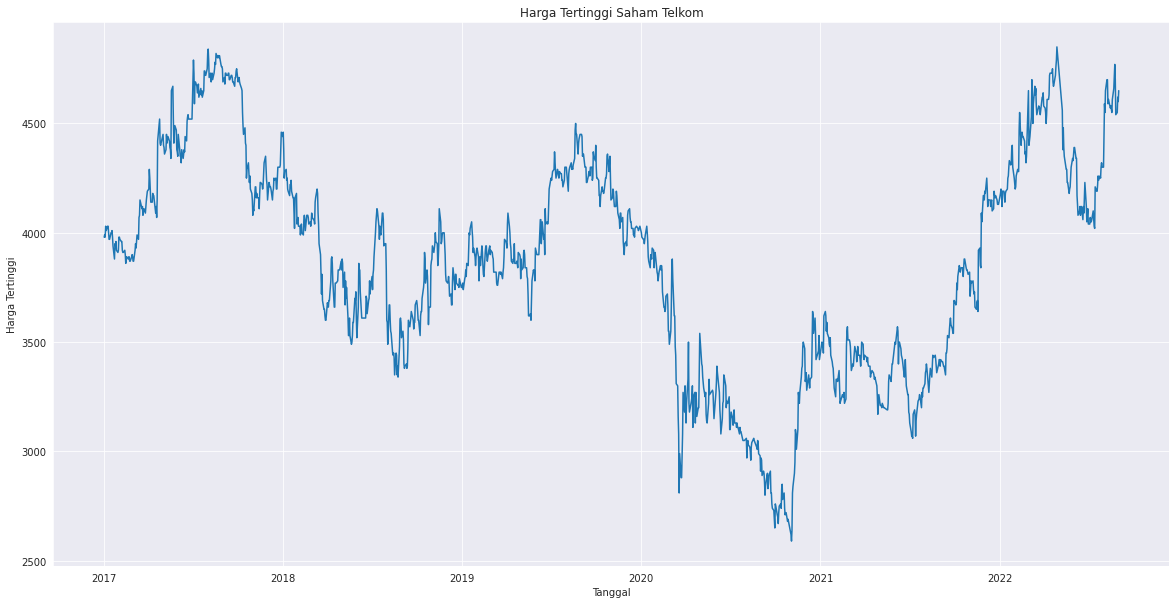

In [ ]:
#Visualisasi dataset
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xlabel('Tanggal')
plt.ylabel('Harga Tertinggi')
plt.title('Harga Tertinggi Saham Telkom')
plt.plot(datasaham['High'])

## Uji Stasioneritas Data

In [ ]:
#Deklarasi fungsi untuk mengecek stasioneritas data
def test_stationarity(timeseries): 
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=22).mean()
    rolstd = timeseries.rolling(window=22).std()
    #case nya selama satu bulan hanya ada 22 transaksi
    #window knp 22 hari karena 8 hari libur selama 30 hari
   

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Uji Hipotesis:

H0 : Data tidak stasioner

Ha : Data stasioner

Tolak H0 apabila diperoleh p-value < alpha (0,05)

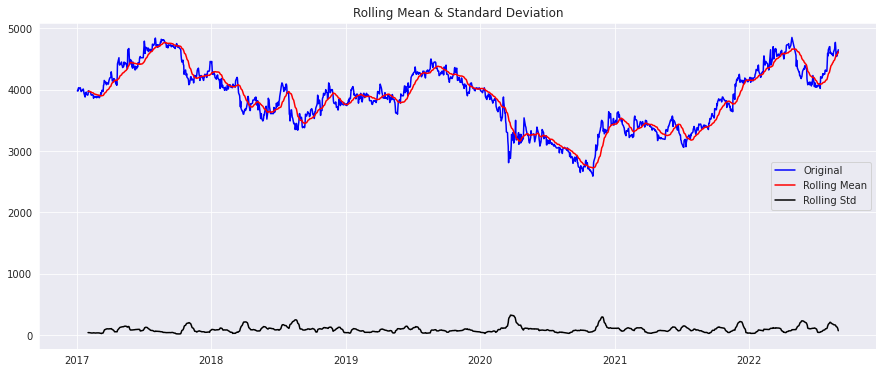

Results of Dickey-Fuller Test:
Test Statistic                   -1.787378
p-value                           0.386746
#Lags Used                        2.000000
Number of Observations Used    1419.000000
Critical Value (1%)              -3.434967
Critical Value (5%)              -2.863579
Critical Value (10%)             -2.567856
dtype: float64


In [ ]:
#Melakukan uji stasioneritas untuk dataset
test_stationarity(ts)
#ts = variabel high

Diperoleh nilai p-value > 0,05, maka H0 tidak ditolak.

Jadi, data memiliki keadaan yang tidak stasioner.

Karena data belum stasioner, sehingga perlu dilakukan proses stasionerisasi data, yakni dengan proses differencing untuk memperoleh data yang stasioner.

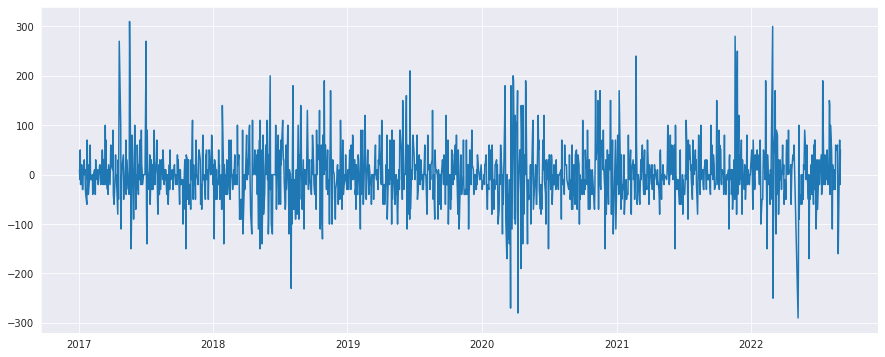

In [ ]:
ts_diff_1 = ts - ts.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)

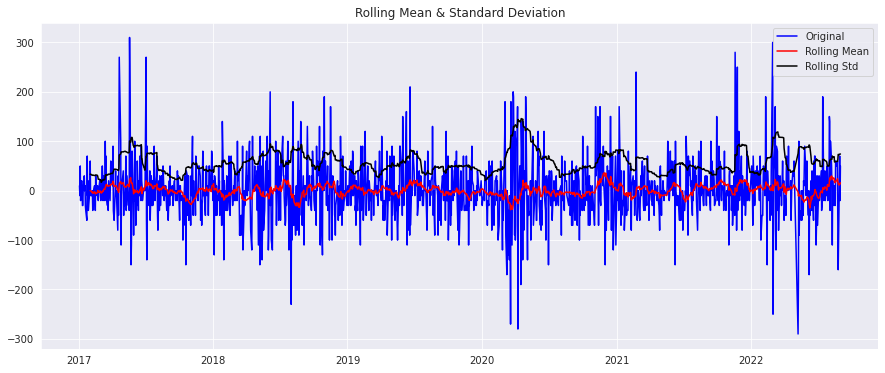

Results of Dickey-Fuller Test:
Test Statistic                  -29.788330
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1419.000000
Critical Value (1%)              -3.434967
Critical Value (5%)              -2.863579
Critical Value (10%)             -2.567856
dtype: float64


In [ ]:
test_stationarity(ts_diff_1)

Setelah dilakukan proses differencing dan diuji stasioneritas data (setelah differencing), diperoleh data setelah differencing 1x telah membentuk data yang stasioner.

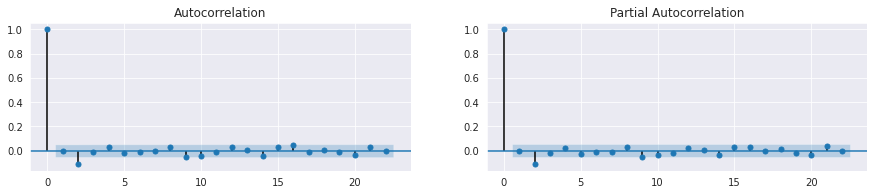

In [ ]:
plt.figure()
plt.subplot(221)
plot_acf(ts_diff_1, ax=plt.gca(), lags=22)
plt.subplot(222)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=22)
plt.show()

- Plot PACF membentuk nilai AR(p) 
- Plot ACF membentuk nilai MA(q)
 
Terlihat pada kedua plot baik plot PACF dan ACF dies down setelah lag ke-0. Jadi, nilai p dan q = 0.

In [ ]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.7)               #data trainingnya 70%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
p_values = range(0, 1)
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(ts.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=497.557
ARIMA(0, 0, 1) RMSE=269.913
ARIMA(0, 1, 0) RMSE=61.315
ARIMA(0, 1, 1) RMSE=61.395
Best ARIMA(0, 1, 0) RMSE=61.315


Setelah dilakukan percobaan dengan model ARIMA(p,d,q) dengan:

- orde p = 0 dan 1
- orde d = 0 dan 1
- orde q = 0 dan 1

Diperoleh model yang menghasilkan RMSE terkecil adalah model ARIMA (0,1,0).

Hal ini sesuai dengan plot ACF dan PACF yang dies down setelah lag ke-0 dan dataset telah mengalami 1x proses differencing.

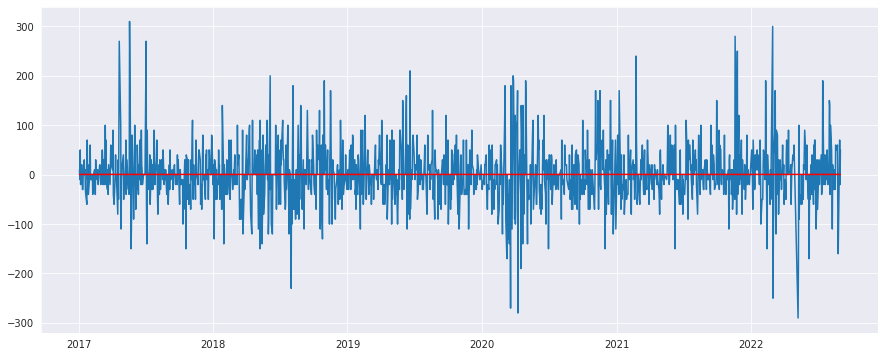

In [ ]:
#Visualisasi perbandingan antara dataset setelah differencing dengan data hasil prediksi ARIMA(0,1,0)
model_ARIMA = ARIMA(ts, order=(0,1,0))
results_ARIMA = model_ARIMA.fit(disp=-1)
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues,copy=True)
plt.plot(ts_diff_1)             
plt.plot(predictions_ARIMA, color='red')  

In [ ]:
#Informasi yang diperoleh dari pemodelan ARIMA(0,1,0) pada dataset
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.High   No. Observations:                 1421
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -7841.421
Method:                           css   S.D. of innovations             60.298
Date:                Thu, 15 Sep 2022   AIC                          15686.843
Time:                        06:21:48   BIC                          15697.361
Sample:                             1   HQIC                         15690.772
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4715      1.600      0.295      0.768      -2.664       3.607
==============================================================================
"""

# Prediksi Data

In [ ]:
#Prediksi data dengan model ARIMA(0,1,0) untuk 3 hari ke depan
predict_dif = results_ARIMA.predict(start=1422,end=1425)
predictions_dif_cum_sum = predict_dif.cumsum()                   #prediksi differencingnya
pred_ts = [ts[-1]]
for i, j in enumerate(predictions_dif_cum_sum):                  #prediksi data aslinya
  a = pred_ts[i] + j
  pred_ts.append(a)
predict = pd.Series(pred_ts[1:], index=predict_dif.index)
print(predict)

1421    4650.471499
1422    4651.414497
1423    4652.828994
1424    4654.714989
dtype: float64


Diperoleh hasil prediksi untuk nilai harga tertinggi saham Telkom pada periode tanggal :
- 01 September 2022 = 4650.47...
- 02 September 2022 = 4651.41...
- 03 September 2022 = 4652.82...
- 04 September 2022 = 4654.71...